In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import  linear_model
from pandas.tools.plotting import scatter_matrix
import tensorflow as tf
%matplotlib inline

In [3]:
boston = load_boston()
names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
df = pd.DataFrame(boston.data, columns=names)
df.ix[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


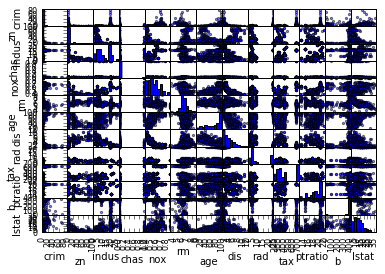

In [40]:
scatter_matrix(df)
plt.show()

In [4]:
x_data=df[:506].as_matrix(columns=None).transpose()
y_data=boston.target[:506]

X = tf.placeholder(tf.float32) #input 느낌
Y = tf.placeholder(tf.float32)

W=tf.Variable(tf.random_uniform([1,13],-1.0,1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
len(x_data)

13

In [9]:
hypothesis =tf.matmul(W,X)+b
cost =tf.reduce_mean(tf.square(hypothesis -Y))

a = tf.Variable(0.000001)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

In [10]:
init =tf.initialize_all_variables()

sess=tf.Session()
sess.run(init)

In [11]:
for step in range(20000000):
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    if step % 50000 == 0:
        print (step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))

print ("final",step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))

0 5325.37 [[-0.07816147 -0.56900895 -0.36088037 -0.16777429  0.02023385 -0.71224982
  -0.10013474  0.56754667 -0.48088109  0.17440362  0.87090385 -0.24502277
  -0.89059484]] [ 0.76101065]
50000 52.1783 [[-0.0445486   0.09496353 -0.13174713 -0.12891851  0.04006625 -0.30934975
   0.13894238  0.40493044 -0.10114741  0.00663878  0.74947029  0.02515817
  -0.92612535]] [ 0.79313707]
100000 48.2025 [[-0.06611034  0.10363538 -0.03894203 -0.09541426  0.05792726  0.07069772
   0.12804648  0.28320864  0.04404635 -0.0013424   0.69184256  0.02611849
  -0.9012903 ]] [ 0.82591963]
150000 45.2045 [[-0.0752457   0.10453705 -0.00750945 -0.06417591  0.07439449  0.43042958
   0.11824189  0.1826366   0.10066491 -0.00467291  0.64098603  0.02569959
  -0.87404698]] [ 0.85769951]
200000 42.6438 [[-0.07939313  0.10298372  0.00270834 -0.03434323  0.08958579  0.76724505
   0.10943946  0.09250017  0.12430598 -0.00617958  0.58734185  0.02503768
  -0.84722489]] [ 0.88750184]
250000 40.4101 [[-0.08161143  0.10064992 